# Задание №1 #
Найти аналитические стационарные точки проверить их на экстремальность, а  
 также определить все локальные и глобальные минимумы и максимумы в  
 приведенных ниже примерах и подтвердить их характер графиками функции:  
 
**8)** *f(x1,x2) = x1^4 + x2^4 - (x1 + x2)^4*
***
Найдем производные функции

In [493]:
#sympy - библиотека для символьных вычислений
from sympy import *
from IPython.display import display

x1, x2 = symbols('x1 x2')
f = x1**4 + x2**4 - (x1 + x2)**4

dif_x1 = diff(f, x1)
dif_x2 = diff(f, x2)

print("Функция f:")
display(f)
print('Производная f по x1:')
display(dif_x1)
print('Производная f по x2:')
display(dif_x2)

Функция f:


x1**4 + x2**4 - (x1 + x2)**4

Производная f по x1:


4*x1**3 - 4*(x1 + x2)**3

Производная f по x2:


4*x2**3 - 4*(x1 + x2)**3

***
Решим систему уравнений для поиска стационарных точек

In [494]:
eq1 = Eq(dif_x1, 0)
eq2 = Eq(dif_x2, 0)
eqs = [eq1, eq2]

stat_p = solve(eqs, (x1, x2))

print('Стационарная точка: (x1, x2) =', stat_p[0])

Стационарная точка: (x1, x2) = (0, 0)


***
Проверим стационарную точку на экстремальность, для чего возьмем 2ю производную  
по каждой переменной и проверим их на достаточное условие экстремума функции 
двух переменных 


In [495]:
dif_x1x1 = diff(dif_x1, x1)
dif_x1x2 = diff(dif_x1, x2)
dif_x2x2 = diff(dif_x2, x2)

print("Вторые производные функции f:")
print('--------------------------------------------------')
display(dif_x1x1)
display(dif_x1x2)
display(dif_x2x2)
print('--------------------------------------------------')

A = dif_x1x1.subs([(x1, stat_p[0][0]), (x2, stat_p[0][1])])
B = dif_x1x2.subs([(x1, stat_p[0][0]), (x2, stat_p[0][1])])
C = dif_x2x2.subs([(x1, stat_p[0][0]), (x2, stat_p[0][1])])

extreme_indicator = A*C - B**2

if(extreme_indicator > 0): 
    if(A > 0):
        print('Локальный минимум в точке: (x1, x2) =', stat_p[0])
    if(A < 0): 
        print('Локальный минимум в точке: (x1, x2) =', stat_p[0])
elif(extreme_indicator < 0):
    print('В точке (x1, x2) =', stat_p, 'экстремум отсутствует')
else: 
    print('Четкий экстремум отсутствует, нужны дополнительные исследования')
    print('Вероятно, точка является седловой')


Вторые производные функции f:
--------------------------------------------------


12*x1**2 - 12*(x1 + x2)**2

-12*(x1 + x2)**2

12*x2**2 - 12*(x1 + x2)**2

--------------------------------------------------
Четкий экстремум отсутствует, нужны дополнительные исследования
Вероятно, точка является седловой


***
Подтвердим характер статической точки, построив график функции

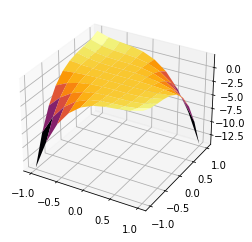

In [496]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#Инициализируем систему координат
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = "3d")

#Задаем количество точек на ось границы
vals_quantity = 10 
vals_range = np.linspace(-1, 1, vals_quantity)

#Генерируем значения сетки для x1 и x2
x1_vals, x2_vals = np.meshgrid(vals_range, vals_range)

#Инициализация пустого двумерного массива значений функции
f_vals = np.empty((vals_quantity, vals_quantity), dtype="float32")

#Подстановка значений x1, x2 в функцию f
i = 0
while(i < vals_quantity ):
    j = 0
    
    while(j < vals_quantity):
        f_vals[i][j] = f.subs([(x1, x1_vals[i][j]), (x2, x2_vals[i][j])])
        j = j + 1
        
    i = i + 1

#Отрисовка графика по точкам
ax.plot_surface(x1_vals, x2_vals, f_vals, cmap = 'inferno')
